In [ ]:
!pip install ucimlrepo
!pip install scikit-learn-extra

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Fetch Abalone dataset from UCI repository(The dataset is fetched from https://archive.ics.uci.edu/ml/datasets/Abalone)
abalone = fetch_openml(name='abalone', version=1, as_frame=True)

X = abalone.data
y = abalone.target

#Steps to Pre process the data
# Drop rows with NaN values
X = X.replace('?',np.NaN)
X = X.dropna()
X = X.drop_duplicates()

X_numeric = X.drop(columns=['Sex'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

print(X.head())


  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  
0         0.150  
1         0.070  
2         0.210  
3         0.155  
4         0.055  


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

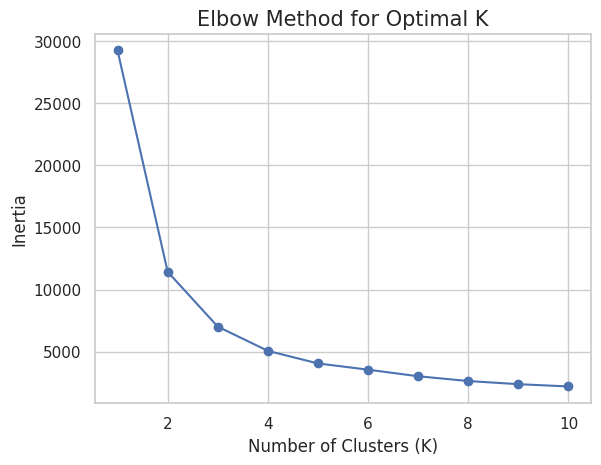

In [ ]:
#elbow Method for finding the optimal K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K', fontsize=15)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


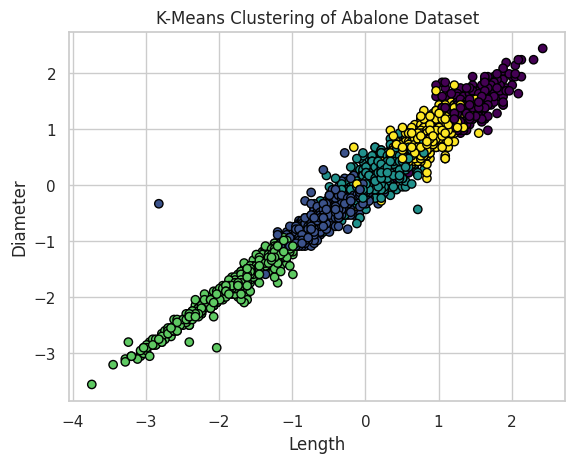

In [ ]:
# Apply k-means clustering Method
kmeans = KMeans(n_clusters=5, random_state=42)
X['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters in 2D (using the first two features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=X['cluster'], cmap='viridis', marker='o', edgecolor='black')
plt.title('K-Means Clustering of Abalone Dataset')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.show()


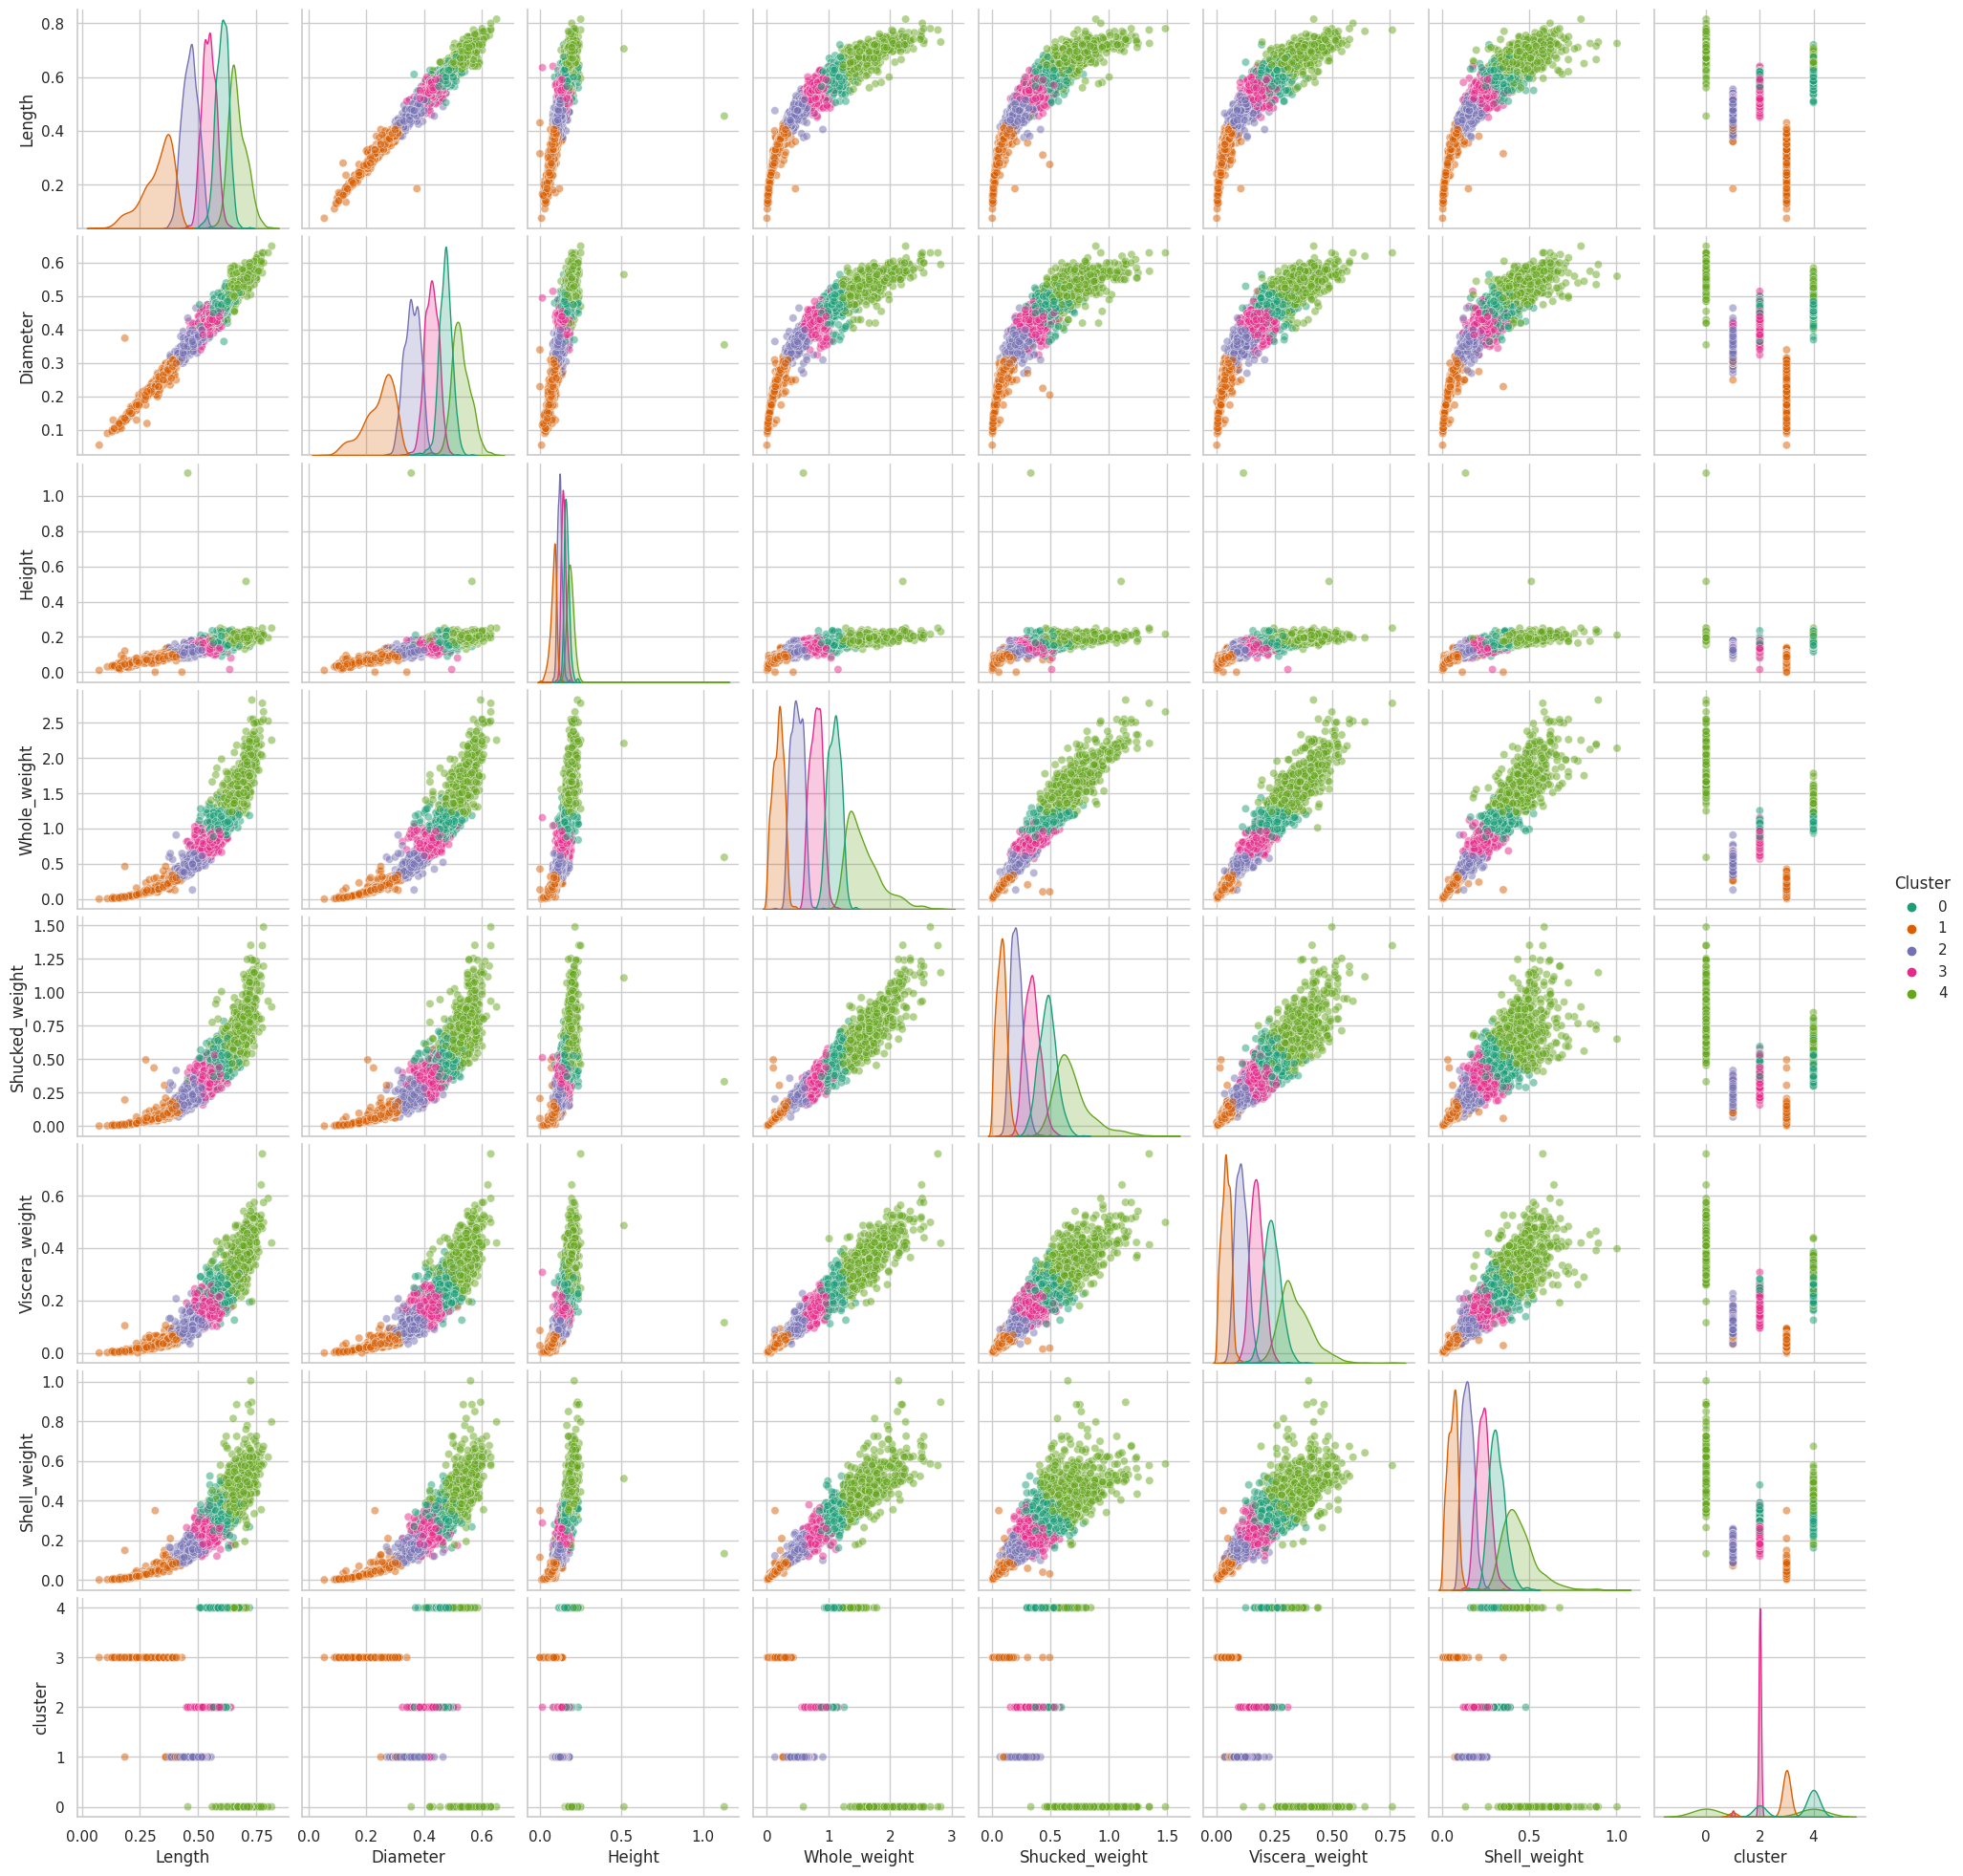

Cluster Centers:
   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.600     0.465   0.165        1.0475          0.4650          0.2345   
1   0.335     0.255   0.085        0.1785          0.0710          0.0405   
2   0.470     0.360   0.120        0.4775          0.2105          0.1055   
3   0.555     0.425   0.145        0.7905          0.3485          0.1765   
4   0.650     0.515   0.180        1.4630          0.6580          0.3135   

   Shell_weight  
0        0.3150  
1        0.0550  
2        0.1500  
3        0.2250  
4        0.4115  


In [ ]:
#Finding out the cluster centers with medoids
n_clusters = 5
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
X['Cluster'] = kmedoids.fit_predict(X_scaled)
# Visualize the clusters (pairplot)
sns.pairplot(X, hue='Cluster', palette='Dark2', plot_kws={'alpha': 0.5})
plt.show()

# Display the cluster centers (medoids)
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmedoids.cluster_centers_), columns=X_numeric.columns)
print("Cluster Centers:")
print(cluster_centers)

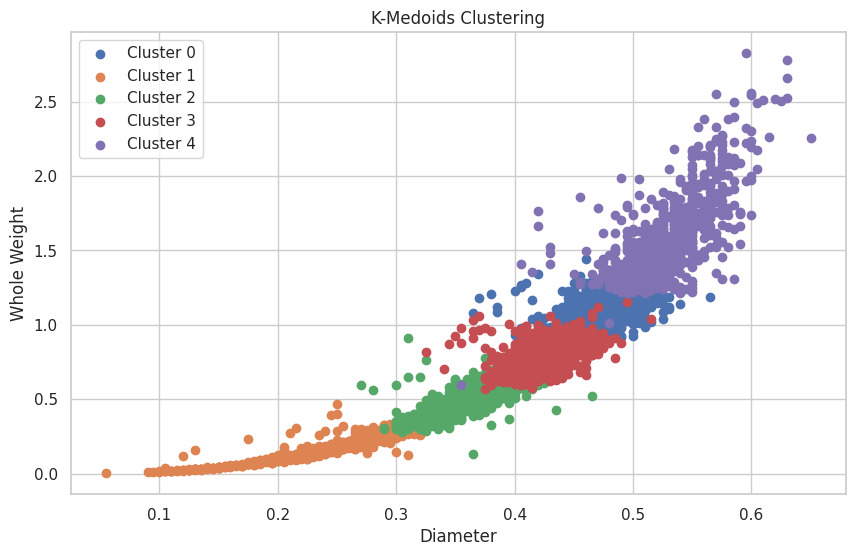

In [ ]:
#Applying the k-Medoid Method

n_clusters = 5
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
X['Cluster'] = kmedoids.fit_predict(X_scaled)

# Visualizing the clusters using a scatter plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

for cluster in range(n_clusters):
    cluster_data = X[X['Cluster'] == cluster]
    plt.scatter(cluster_data['Diameter'], cluster_data['Whole_weight'], label=f'Cluster {cluster}')

plt.title('K-Medoids Clustering')
plt.xlabel('Diameter')
plt.ylabel('Whole Weight')
plt.legend()
plt.show()


In [ ]:
#Finding the Silhouette btween the methods
kmeans_clusters = kmeans.fit_predict(X_scaled)
kmedoids_clusters = kmedoids.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X_scaled, kmeans_clusters)
silhouette_kmedoids = silhouette_score(X_scaled, kmedoids_clusters)

print(f"Silhouette Score (K-Means): {silhouette_kmeans}")
print(f"Silhouette Score (K-Medoids): {silhouette_kmedoids}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means): 0.3868884213032877
Silhouette Score (K-Medoids): 0.3423170474465449


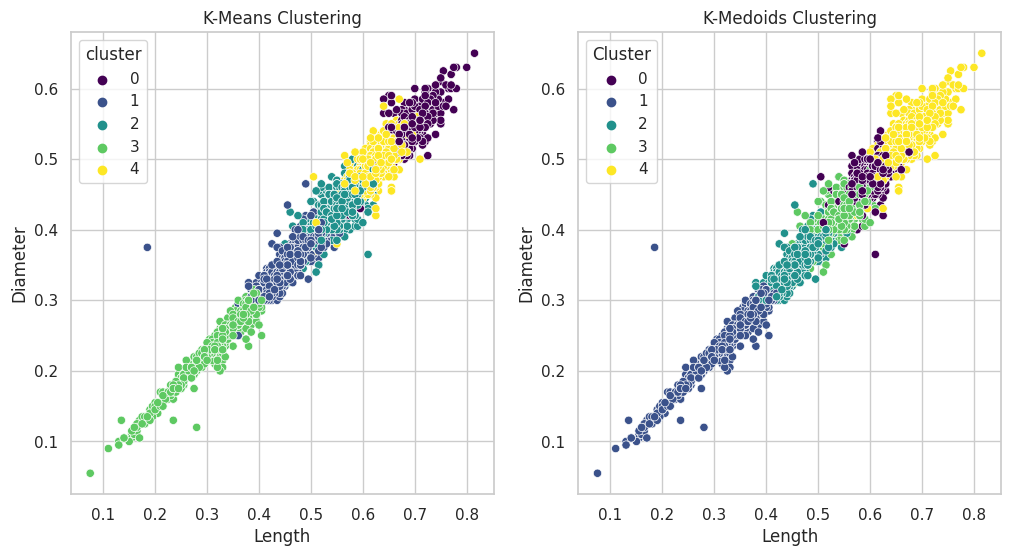

In [ ]:
#Comparision of clusterign between two methods
plt.figure(figsize=(12, 6))

# K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(x='Length', y='Diameter', hue='cluster', data=X, palette='viridis')
plt.title('K-Means Clustering')

# K-Medoids
plt.subplot(1, 2, 2)
sns.scatterplot(x='Length', y='Diameter', hue='Cluster', data=X, palette='viridis')
plt.title('K-Medoids Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and bein

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', 'accuracy', 'macro avg', 'weighted avg'])


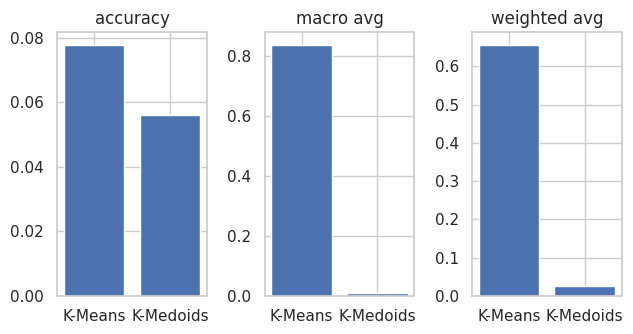

In [ ]:
#Comparing few metrics with both the models

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Train K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_clusters_train = kmeans.fit_predict(X_train)
kmeans_clusters_test = kmeans.predict(X_test)

# Train K-Medoids
n_clusters = 5  # You can adjust the number of clusters
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
kmedoids_clusters_train = kmedoids.fit_predict(X_train)
kmedoids_clusters_test = kmedoids.predict(X_test)

#metrics_names = ['Accuracy','Precision', 'Recall', 'F1 Score']

metrics_kmeans_train = []
metrics_kmeans_test = []
metrics_kmedoids_train = []
metrics_kmedoids_test = []

# Metrics calculation for K-Means (Train and Test)
classification_kmeans_train = classification_report(y_train, kmeans_clusters_train, output_dict=True, zero_division=1)
classification_kmeans_test = classification_report(y_test, kmeans_clusters_test, output_dict=True)

# Metrics calculation for K-Medoids (Train and Test)
classification_kmedoids_train = classification_report(y_train, kmedoids_clusters_train, output_dict=True)
classification_kmedoids_test = classification_report(y_test, kmedoids_clusters_test, output_dict=True)

print(classification_kmeans_train.keys())

metrics_names = ['accuracy', 'macro avg', 'weighted avg']

# Metrics collection for K-Means and K-Medoids
for metric_name in metrics_names:
    if isinstance(classification_kmeans_train[metric_name], dict):
        metrics_kmeans_train.append(classification_kmeans_train[metric_name]['precision'])
    else:
        metrics_kmeans_train.append(classification_kmeans_train[metric_name])

    if isinstance(classification_kmeans_test[metric_name], dict):
        metrics_kmeans_test.append(classification_kmeans_test[metric_name]['precision'])
    else:
        metrics_kmeans_test.append(classification_kmeans_test[metric_name])

    if isinstance(classification_kmedoids_train[metric_name], dict):
        metrics_kmedoids_train.append(classification_kmedoids_train[metric_name]['precision'])
    else:
        metrics_kmedoids_train.append(classification_kmedoids_train[metric_name])

    if isinstance(classification_kmedoids_test[metric_name], dict):
        metrics_kmedoids_test.append(classification_kmedoids_test[metric_name]['precision'])
    else:
        metrics_kmedoids_test.append(classification_kmedoids_test[metric_name])


# Plotting the metrics
fig, axes = plt.subplots(1, 3, figsize=(6.5, 3.5))

metrics_train = [metrics_kmeans_train, metrics_kmedoids_train]
metrics_names_to_plot = ['accuracy', 'macro avg', 'weighted avg']

for i, metric_name in enumerate(metrics_names_to_plot):
    axes[i].bar(['K-Means', 'K-Medoids'],
                [metrics_train[0][i], metrics_train[1][i]])
    axes[i].set_title(metric_name)

plt.tight_layout()
plt.show()
